In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotting_routines as pltrs
from IPython.display import display

In [173]:
df_dir = "./pandas-dfs/"
df_filename = "fireyear-to-lat-long.pkl"
df = pd.read_pickle(df_dir+df_filename)
print(df.head()) # Ordered by Discovery Date

   FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY DISCOVERY_TIME  \
0       1992       1/1/1992              1           0130   
1       1992       1/1/1992              1           1400   
2       1992       1/1/1992              1           2207   
3       1992       1/1/1992              1           1330   
4       1992       1/1/1992              1           1234   

  NWCG_CAUSE_CLASSIFICATION                       NWCG_GENERAL_CAUSE  \
0                   Natural                                  Natural   
1                     Human                  Debris and open burning   
2                     Human                Equipment and vehicle use   
3                     Human                  Debris and open burning   
4                     Human  Missing data/not specified/undetermined   

  NWCG_CAUSE_AGE_CATEGORY CONT_DOY CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS  \
0                                1      0210        0.1               A   
1                                1      2100      

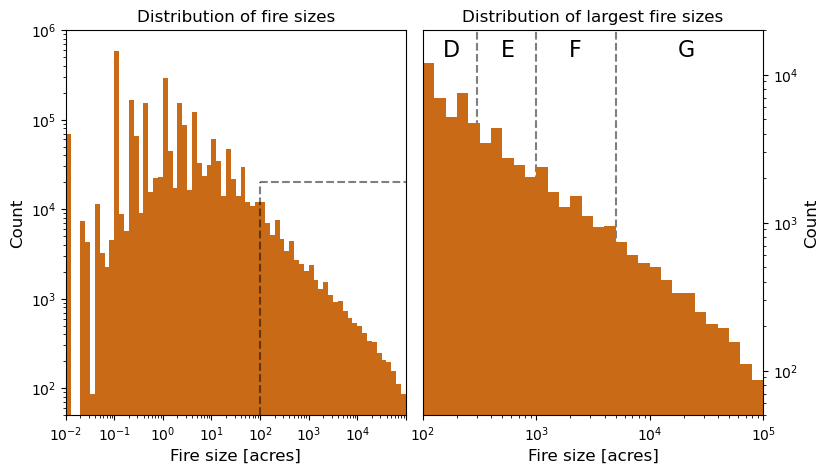

In [164]:
df_lrg = df.loc[(df['FIRE_SIZE'] >= 100), ['NWCG_GENERAL_CAUSE','FIRE_YEAR','FIRE_SIZE',
                                           'DISCOVERY_TIME','FIRE_SIZE_CLASS',
                                          'LATITUDE', 'LONGITUDE']]

fig, axs = plt.subplots(1,2, figsize=[9,5])
plt.subplots_adjust(wspace=0.05)

ax = axs[0]
ax.vlines([100], 50, 20000, colors='k', ls='--', alpha=0.5, zorder=1)
ax.hlines([20000], 10**(2),10**(5), colors='k', ls='--', alpha=0.5, zorder=1)
ax.hist(df['FIRE_SIZE'], bins=np.logspace(-2,5, 71),
       color="#c96a16", zorder=0)
ax.set_xscale('log'); ax.set_yscale('log');
ax.set_xlim([10**(-2),10**(5)])
ax.set_ylim([50,1000000])

xticks = ax.xaxis.get_major_ticks()
xticks[-2].label1.set_visible(False)

ax.set_xlabel("Fire size [acres]", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Distribution of fire sizes")

ax = axs[1]
ax.vlines([300,1000,5000], 50, 20000, colors='k', ls='--', alpha=0.5, zorder=0)
ax.hist(df_lrg['FIRE_SIZE'], bins=np.logspace(2,5, 31), zorder=1, color="#c96a16")

ax.text(0.06, 0.93, "D", fontsize=16, transform=ax.transAxes)
ax.text(0.23, 0.93, "E", fontsize=16, transform=ax.transAxes)
ax.text(0.43, 0.93, "F", fontsize=16, transform=ax.transAxes)
ax.text(0.75, 0.93, "G", fontsize=16, transform=ax.transAxes)


ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.set_xscale('log'); ax.set_yscale('log');
ax.set_xlim([10**(2),10**(5)])
ax.set_ylim([50, 20000])

ax.set_xlabel("Fire size [acres]", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Distribution of largest fire sizes")

plt.show()

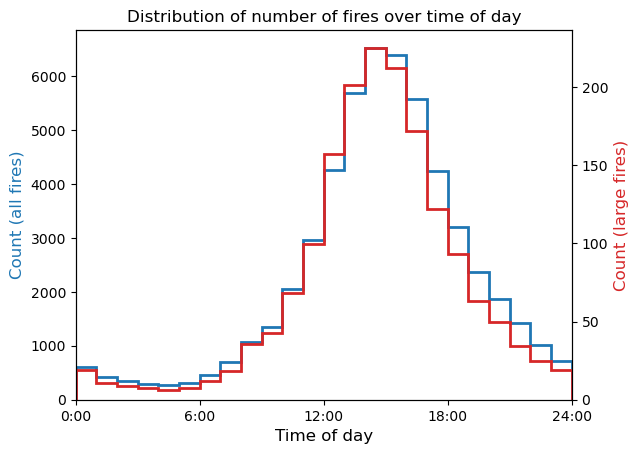

In [42]:
disctime = df['DISCOVERY_TIME'].replace('', np.nan).dropna().astype('int64')
disctime_lf = df_lrg['DISCOVERY_TIME'].replace('', np.nan).dropna().astype('int64')

fig, ax = plt.subplots()

norm = 28 # to get bin values in number of fires per year
hist, bin_edges = np.histogram(disctime, bins=np.linspace(0,2400,25))
ax.stairs(hist/norm, bin_edges, lw=2, color='C0')
ax.set_ylabel("Count (all fires)", fontsize=12, color='C0')

ax2=ax.twinx()
hist, bin_edges = np.histogram(disctime_lf, bins=np.linspace(0,2400,25))
ax2.stairs(hist/norm, bin_edges, lw=2, color='C3')
ax2.set_ylabel("Count (large fires)", fontsize=12, color='C3')

ax.set_xlim(0,2400)
ax.set_xticks([0,600,1200,1800,2400])
ax.set_xticklabels(["0:00","6:00","12:00","18:00","24:00"])
ax.set_xlabel('Time of day', fontsize=12)
ax.set_title('Distribution of number of fires over time of day')

plt.show()

In [250]:
dfcausecounts = df_lrg['NWCG_GENERAL_CAUSE'].value_counts().to_frame()

dfcausecounts.rename(columns={'NWCG_GENERAL_CAUSE': 'Counts'}, inplace=True)
dfcausecounts['Cause of fire'] = dfcausecounts.index
dfcausecounts = dfcausecounts[['Cause of fire','Counts']]

styler = dfcausecounts.style
styler = dfcausecounts.style
styler.hide(axis="index")

Cause of fire,Counts
Natural,19579
Missing data/not specified/undetermined,15774
Arson/incendiarism,10886
Debris and open burning,8125
Equipment and vehicle use,5700
Power generation/transmission/distribution,1428
Recreation and ceremony,1296
Railroad operations and maintenance,980
Smoking,660
Fireworks,445


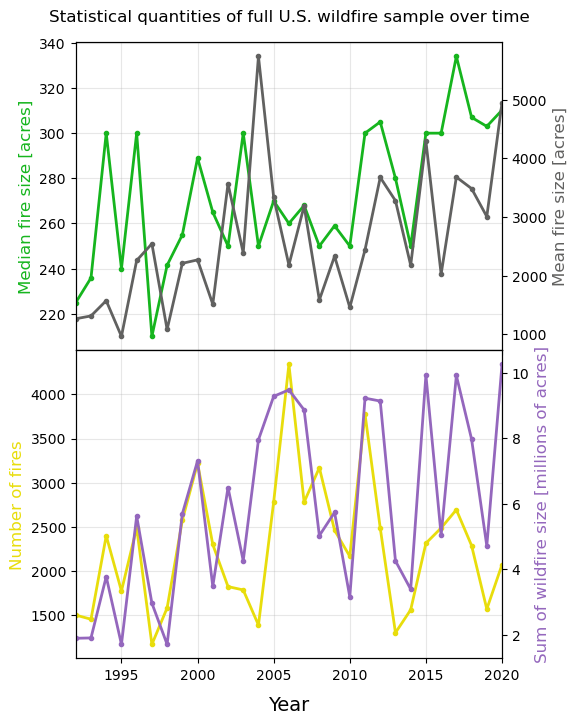

In [148]:
def compute_firesize_overtime(dataframe):
    #d = dataframe.loc[(dataframe['FIRE_SIZE'] >= 100), ['FIRE_YEAR','FIRE_SIZE','DISCOVERY_TIME']]
    median = dataframe.groupby(['FIRE_YEAR'])['FIRE_SIZE'].median()
    mean = dataframe.groupby(['FIRE_YEAR'])['FIRE_SIZE'].mean()
    summ = dataframe.groupby(['FIRE_YEAR'])['FIRE_SIZE'].sum()
    count = dataframe.groupby(['FIRE_YEAR'])['FIRE_SIZE'].count()
    return median, mean, summ, count

def plot_firesize_overtime(med, mean, summ, count, title):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=[5.5,8])
    plt.subplots_adjust(hspace=0.0)

    ax = axs[0]

    ax.plot(med, '.-', color='#16b51e',  lw=2)
    ax.set_ylabel("Median fire size [acres]", fontsize=12, color='#16b51e')
    ax2=ax.twinx()
    ax2.plot(mean, '.-', color='#616160', lw=2)
    ax2.set_ylabel("Mean fire size [acres]", fontsize=12, color='#616160')

    ax.grid(visible=True, zorder=-1, alpha=0.3)
    ax.set_title(title, pad=15)
    
    ax = axs[1]
    ax.plot(count, '.-', color='#e8dd0c', lw=2)
    ax.set_ylabel("Number of fires", fontsize=12, color='#e8dd0c')
    ax2=ax.twinx()
    ax2.plot(summ/1e6, '.-', color='C4', lw=2)
    ax2.set_ylabel("Sum of wildfire size [millions of acres]", fontsize=12, color='C4')
    #ax2.ticklabel_format(style='sci', axis='y')# scilimits=(0,7))
    ax2.ticklabel_format(style='plain',axis='y')
    
    ax.set_xlim([med.index.min(), med.index.max()])
    ax.set_xlabel("Year", fontsize=14, labelpad=10)
    
    ax.grid(visible=True, zorder=-1, alpha=0.3)
    
    plt.show()
    
med_all, mean_all, sum_all, cnt_all = compute_firesize_overtime(df_lrg)
plot_firesize_overtime(med_all, mean_all, sum_all, cnt_all,
                       "Statistical quantities of full U.S. wildfire sample over time")

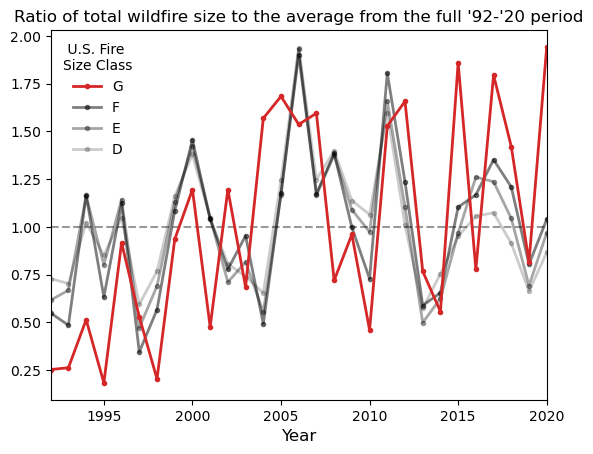

In [141]:
fig, ax = plt.subplots()

size_classes = sorted(df_lrg['FIRE_SIZE_CLASS'].unique()) # sorted alphabetically

alphas = [1.0,0.5,0.35,0.2]
colours = ['C3', 'k', 'k', 'k']
zorders = [1, 0, 0, 0]
ai = 0
for sc in np.flip(size_classes):
    df1 = df_lrg.loc[(df_lrg['FIRE_SIZE_CLASS'] == sc),['FIRE_YEAR', 'FIRE_SIZE']]
    sumfsize = df1.groupby(['FIRE_YEAR'])['FIRE_SIZE'].sum()
    plt.plot(sumfsize/np.mean(sumfsize), '.-', lw=2,
             color=colours[ai], alpha=alphas[ai], zorder=zorders[ai],
            label=sc)
    ai += 1
    
ax.hlines(1.0, sumfsize.index.min(), sumfsize.index.max(),
              color="k", ls="--", alpha=0.4, zorder=0)
    
ax.set_xlabel("Year",fontsize=12)
#ax.set_ylabel("Sum of wildfire size divided by the mean", fontsize=12)
ax.set_title("Ratio of total wildfire size to the average from the full '92-'20 period", fontsize=12)
ax.legend(title=" U.S. Fire\nSize Class",frameon=False)
ax.set_xlim([sumfsize.index.min(), sumfsize.index.max()])
plt.show()

In [262]:
lrgfires_00_20 = df_lrg[(df_lrg['FIRE_YEAR'] >= 2000) & (df_lrg['FIRE_YEAR'] < 2020)]
lrgfires_00_20 = lrgfires_00_20.sort_values(by='FIRE_SIZE', ascending=False).head(n=10)

lrgfires_00_20.rename(columns={'FIRE_YEAR': 'Year', 'FIRE_SIZE': 'Size',
                              'LATITUDE': 'Latitude', 'LONGITUDE': 'Longitude'},inplace=True)
#print(lrgfires_00_20)
lrgfires_00_20['Size'] = lrgfires_00_20['Size'].div(1000).map('{:.1f}'.format)
lrgfires_00_20['Latitude'] = lrgfires_00_20['Latitude'].map('{:.3f}'.format)
lrgfires_00_20['Longitude'] = lrgfires_00_20['Longitude'].map('{:.3f}'.format)
#lrgfires_00_20['Size'] = lrgfires_00_20['Size']
#dfcausecounts['Cause of fire'] = dfcausecounts.index
#dfcausecounts = dfcausecounts[['Cause of fire','Counts']]

lrgfires_00_20.rename(columns={'Size': 'Size (thousands of acres)'}, inplace=True)
styler = lrgfires_00_20[['Year','Size (thousands of acres)', 'Latitude', 'Longitude']].style
styler.hide(axis="index")
styler.set_caption("Top 10 largest fires in the U.S.A from 2000 to 2020")
styler = display(styler.set_properties(**{
    'text-align': 'center',
    'white-space': 'pre-wrap',
}))

Year,Size (thousands of acres),Latitude,Longitude
2017,662.7,36.774,-100.175
2012,558.2,42.392,-117.894
2011,538.0,33.606,-109.450
2004,537.6,65.266,-146.886
2009,517.1,64.747,-149.505
2002,499.9,42.039,-123.912
2004,483.3,66.303,-149.884
2006,479.5,35.668,-101.371
2004,464.0,63.816,-143.819
2012,461.0,41.973,-118.365


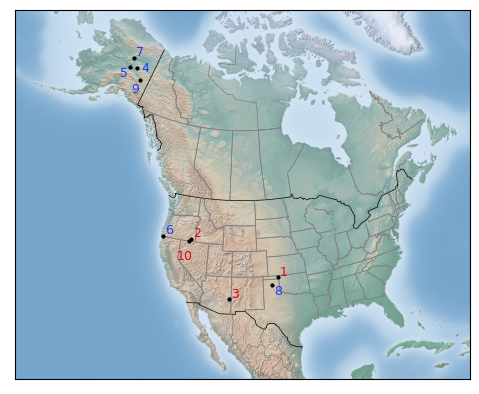

In [171]:
fig, ax = plt.subplots()

m = Basemap(width=8000000,height=6500000,projection='lcc',
            resolution='l',lat_0=50,lon_0=-107.)
m.shadedrelief()
m.drawcountries()
m.drawstates(color='0.5')

x, y = m(lrgfires_00_20['LONGITUDE'], lrgfires_00_20['LATITUDE'])

ax.plot(x, y, 'ok', ms=2)

cnti = 0
for i in lrgfires_00_20.index:
    adjx = 0.0; adjy = 0.0;
      
    if(i == 1412216):   # 4
        adjx = 30000; adjy = -100000;
    elif(i == 1474620): # 5
        adjx = -200000; adjy = -200000;        
    elif(i == 643004):  # 8
        adjx = 0; adjy = -200000;
    elif(i == 1445525): # 9
        adjx = -200000; adjy = -250000;       
    elif(i == 2101843): # 10
        adjx = -250000; adjy = -350000;
        
    if(lrgfires_00_20.loc[i]['FIRE_YEAR'] < 2010):
        textclr = '#1e3bfa'
    else:
        textclr = '#e6020e'
               
    plt.text(x[cnti]+35000+adjx, y[cnti]+35000+adjy,
             str(cnti+1), color=textclr, fontsize=9)
    cnti += 1
plt.show()

In [104]:
# Create new dataframe based on latitude and longitude cuts

# Continental U.S.
conUS = df[(df['LATITUDE'] > 23) & (df['LATITUDE'] < 50) &
            (df['LONGITUDE'] > -130)]

# Alaska
AK = df[df['LATITUDE'] > 50]

conUS_00_10 = conUS[(conUS['FIRE_YEAR'] >= 2000) & (conUS['FIRE_YEAR'] < 2010)]
conUS_10_20 = conUS[(conUS['FIRE_YEAR'] >= 2010) & (conUS['FIRE_YEAR'] < 2020)]
conUS_00_20 = conUS[(conUS['FIRE_YEAR'] >= 2000) & (conUS['FIRE_YEAR'] < 2020)]

conUS = conUS.loc[(conUS['FIRE_SIZE'] >= 100), ['NWCG_GENERAL_CAUSE','FIRE_YEAR','FIRE_SIZE',
                                           'DISCOVERY_TIME','FIRE_SIZE_CLASS',
                                           'LONGITUDE','LATITUDE']]

AK_00_10 = AK[(AK['FIRE_YEAR'] >= 2000) & (AK['FIRE_YEAR'] < 2010)]
AK_10_20 = AK[(AK['FIRE_YEAR'] >= 2010) & (AK['FIRE_YEAR'] < 2020)]
AK_00_20 = AK[(AK['FIRE_YEAR'] >= 2000) & (AK['FIRE_YEAR'] < 2020)]

AK = AK.loc[(AK['FIRE_SIZE'] >= 100), ['NWCG_GENERAL_CAUSE','FIRE_YEAR','FIRE_SIZE',
                                           'DISCOVERY_TIME','FIRE_SIZE_CLASS',
                                           'LONGITUDE','LATITUDE']]

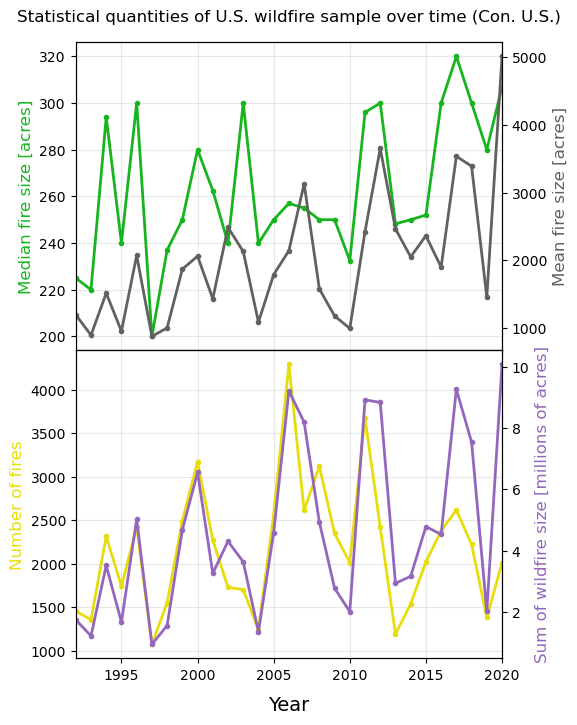

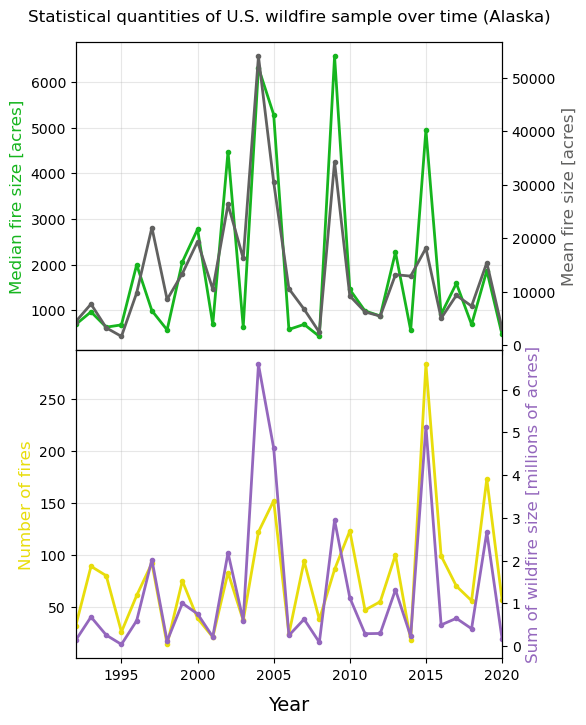

In [152]:
med_cUS, mean_cUS, sum_cUS, cnt_cUS = compute_firesize_overtime(conUS)
med_AK,  mean_AK,  sum_AK,  cnt_AK  = compute_firesize_overtime(AK)

plot_firesize_overtime(med_cUS, mean_cUS, sum_cUS, cnt_cUS,
                      "Statistical quantities of U.S. wildfire sample over time (Con. U.S.)")
plot_firesize_overtime(med_AK,  mean_AK,  sum_AK,  cnt_AK,
                      "Statistical quantities of U.S. wildfire sample over time (Alaska)")

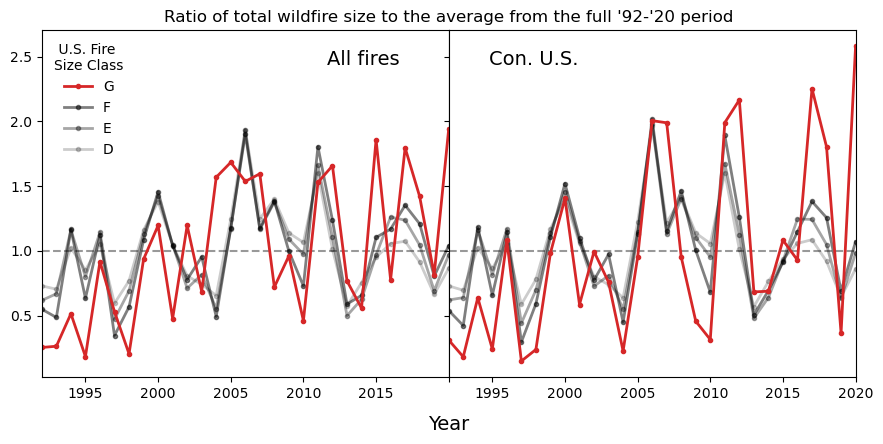

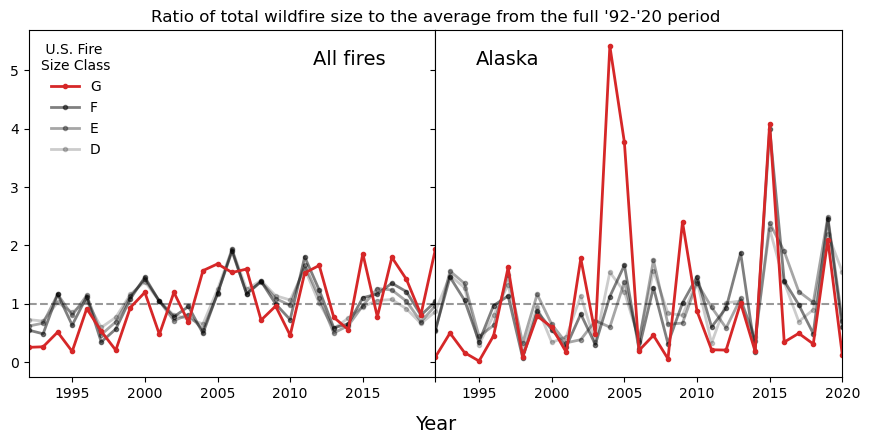

In [153]:
def plot_firesizeclass_2frame(subdf, labelstr):
    fig, axs = plt.subplots(1,2, sharey=True, figsize=[10.5,4.5])
    plt.subplots_adjust(wspace=0.0)
    
    alphas = [1.0,0.5,0.35,0.2]
    colours = ["C3", "k", "k", "k"]
    zorders = [1, 0, 0, 0]
    ai = 0
    ax = axs[0]
    for sc in np.flip(size_classes):
        df1 = df_lrg.loc[(df_lrg['FIRE_SIZE_CLASS'] == sc),['FIRE_YEAR', 'FIRE_SIZE']]
        sumfsize = df1.groupby(['FIRE_YEAR'])['FIRE_SIZE'].sum()#.to_numpy()
        #print(totfiresize)
        ax.plot(sumfsize/np.mean(sumfsize), ".-", lw=2,
                color=colours[ai], alpha=alphas[ai], zorder=zorders[ai],
                label=sc)
        ai += 1
    ax.hlines(1.0, sumfsize.index.min(), sumfsize.index.max(),
              color="k", ls="--", alpha=0.4, zorder=0)
        
    xticks = ax.xaxis.get_major_ticks()
    xticks[-2].label1.set_visible(False)
    ax.text(0.70, 0.90, "All fires", fontsize=14, transform=ax.transAxes)
    ax.set_xlim([sumfsize.index.min(), sumfsize.index.max()])
    ax.legend(title=" U.S. Fire\nSize Class",frameon=False, loc='upper left')
    
    #ax.set_ylabel("Sum of wildfire size divided by the mean", fontsize=12)

    ai = 0
    ax = axs[1]
    for sc in np.flip(size_classes):
        df1 = subdf.loc[(subdf['FIRE_SIZE_CLASS'] == sc),['FIRE_YEAR', 'FIRE_SIZE']]
        sumfsize = df1.groupby(['FIRE_YEAR'])['FIRE_SIZE'].sum()#.to_numpy()
        #print(totfiresize)
        ax.plot(sumfsize/np.mean(sumfsize), ".-", lw=2,
                color=colours[ai], alpha=alphas[ai], zorder=zorders[ai],
                label=sc)
        ai += 1
        
    ax.hlines(1.0, sumfsize.index.min(), sumfsize.index.max(),
              color="k", ls="--", alpha=0.4, zorder=0)
        
    ax.text(0.10, 0.90, labelstr, fontsize=14, transform=ax.transAxes)
    ax.set_xlim([sumfsize.index.min(), sumfsize.index.max()])
    
    fig.add_subplot(111, frameon=False)
    plt.xticks([]); plt.yticks([]);
    plt.xlabel("Year",fontsize=14, labelpad=24)
    plt.title("Ratio of total wildfire size to the average from the full '92-'20 period", fontsize=12)


plot_firesizeclass_2frame(conUS, "Con. U.S.")
plot_firesizeclass_2frame(AK, "Alaska")

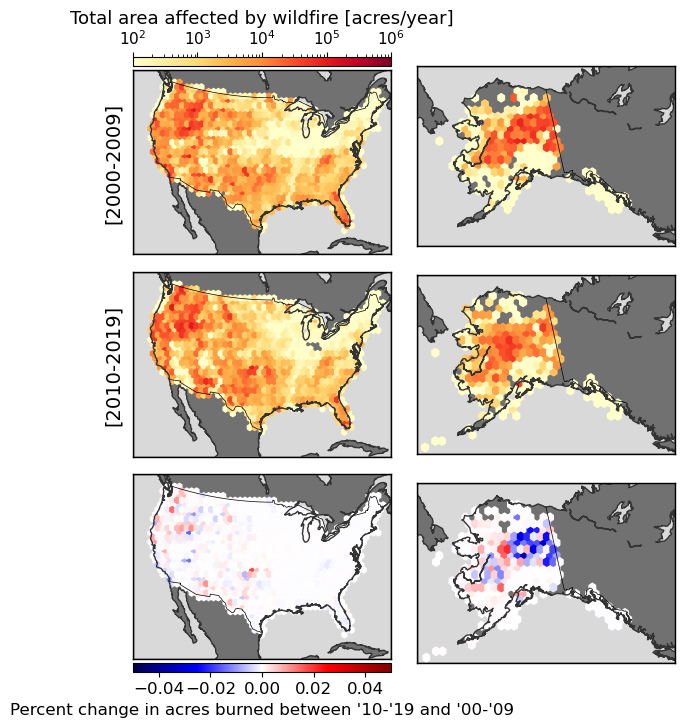

In [121]:
# lat & long pairs for the lower left and upper right corners, respectively
cUS_corners = [-120, 18, -62, 50];
AK_corners = [-170, 52, -105, 65]

# centering lat. and long.
cUS_ll0 = [40, -95]
AK_ll0 = [62.5, -155]

# gridsize argument to hexbin for each data set
# Manually adjusted until land per hex is roughly equal in each
# map, see prints at the bottom of the cell
cUS_hexgrid = [48,16]; AK_hexgrid = [40,12]; AK_hexgrid2 = [29,12];
cblimits = [100,1000000]
cblimits_diff = [-0.05, 0.05]

fig, axs = plt.subplots(3,2, figsize=[7,8])
plt.subplots_adjust(wspace = 0.1, hspace=0.05)

bColourbar = True
plt.axes(axs[0,0])
norm = 10 # normalization: 10 years and 1000,to get data as 1000's of acres per annum.
hex_cUS_00_10 = pltrs.plot_hexbin_frame( conUS_00_10, norm,
    cUS_corners, cUS_ll0, cUS_hexgrid,
    bColourbar, cblimits)
plt.ylabel('[2000-2009]', fontsize=14)

bColourbar = False
plt.axes(axs[0,1])
hex_AK_00_10 = pltrs.plot_hexbin_frame( AK_00_10, norm,
    AK_corners, AK_ll0, AK_hexgrid,
    bColourbar, cblimits)

"""
# Check that the sum of hexbin 2D histogram values equals
# the sum of the FIRE_SIZE from the raw data
# From this print I caught that the default function hexbin()
# uses to ammalgamate given colour values is mean, not sum!
print("sum check:", AK_00_10['FIRE_SIZE'].sum()/norm,
      np.sum(hex_AK_00_10.get_array()))
"""

plt.axes(axs[1,0])
hex_cUS_10_20 = pltrs.plot_hexbin_frame( conUS_10_20, norm,
    cUS_corners, cUS_ll0, cUS_hexgrid,
    bColourbar, cblimits)
plt.ylabel('[2010-2019]', fontsize=14)

plt.axes(axs[1,1])
hex_AK_10_20 = pltrs.plot_hexbin_frame( AK_10_20, norm,
    AK_corners, AK_ll0, AK_hexgrid2,
    bColourbar, cblimits)

bColourbar = True
plt.axes(axs[2,0])

norm = conUS_00_10['FIRE_SIZE'].sum()
#norm = 20*np.sum(hex_cUS_00_10.get_array())
# 20 years, and then the sum of all fires from '00-'09, to get % change
hdiff_cUS = pltrs.plot_hexbin_frame_diff( conUS_00_20, norm,
    cUS_corners, cUS_ll0, cUS_hexgrid,
    bColourbar, cblimits_diff)

bColourbar = False
plt.axes(axs[2,1])
norm = AK_00_10['FIRE_SIZE'].sum()
hdiff_AK = pltrs.plot_hexbin_frame_diff( AK_00_20, norm,
    AK_corners, AK_ll0, AK_hexgrid,
    bColourbar, cblimits_diff)

"""
AK_area = 0.663 # Million sq. mi.
cUS_area = 3.119 # Million sq. mi.
print("Hex and Area ratios:")
print("Land Area: {:.3f} ; Con. US.: {:.3f} ; Alaska(1): {:.3f}; Alaska(2): {:.3f}".
      format( cUS_area/AK_area,
    hex_cUS_00_10.get_array().shape[0]/hex_cUS_10_20.get_array().shape[0],
    hex_cUS_00_10.get_array().shape[0]/hex_AK_00_10.get_array().shape[0],
    hex_cUS_00_10.get_array().shape[0]/hex_AK_10_20.get_array().shape[0]))
# Wanted to confirm the hexes in both plots represent roughly the same area
# Checking that ratio of land area is (roughly) same to ratio of number of hexes
# Played with the hex grid variables until this was true
# It's not perfect; not all hexes are the same size, clearly
"""

plt.show()